# <font color = "darkblue">DBSCAN - Density Based Spatial Clustering of Applications with Noise
<a href= 'https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf'>Research Paper</a>

Consider a set of points in some space to be clustered. Let ε be a parameter specifying the radius of a neighborhood with respect to some point. For the purpose of DBSCAN clustering, the points are classified as core points, (density-) reachable points and outliers, as follows: 

* a point p is a core point if at least minPts are within distance epsilon of it ( including p) 
* a point q is directly reachable from p if point q is within distance epsilon form core point p. Points are only said to be directly from core points. 
* a point q is reachable from p is there is a path p1,...pn with p1=p and pn=q, where each p(i+1) is directly reachable from pi. This implies that the initial point and all points on the path must be core points, with the possible exception of q. 
* all points not reachable from any other point are outliers or noise points. 
* so if p is a core point, then it forms a cluster

=====================================================
* `Border Point`: p is a border point if it does not have at least minpts neighbours within eps  distance of itself, but is a neighbour of a core point. 
* `Noise`: p is a noise if it does not have at least minpts neighbors within eps distance of itself, and is not a neigbor of a core point.
* `Density reachable` : p is density reachable from q if there are a chain of points that are directly density reachable from q to p. 
* `Directly density reachable`: p is directly density reachable from core-point q if it is in the neighborhood of q. 
* `Cluster`: choose core point q, a cluster C contains all points density reachable by q. 
* `Noise` : any point not in a cluster

Note: Now if p is a core point, then it forms a cluster together with all points that are reachable from it. Each cluster contains at least one core point, non-core points can be a part of a cluster, but they form its edge, since they cannot be used to reach more points. 

<img src ="https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/DBSCAN-Illustration.svg/600px-DBSCAN-Illustration.svg.png">

In this diagram, minPts = 4. Point A and the other red points are core points, because the area surrounding these points in an ε radius contain at least 4 points (including the point itself). Because they are all reachable from one another, they form a single cluster. Points B and C are not core points, but are reachable from A (via other core points) and thus belong to the cluster as well. Point N is a noise point that is neither a core point nor directly-reachable

Reachability is not a symmetric relation: by definition, only core points can reach non-core points. The opposite is not true, so a non-core point may be reachable, but nothing can be reached from it. Therefore, a further notion of connectedness is needed to formally define the extent of the clusters found by DBSCAN. Two points p and q are density-connected if there is a point o such that both p and q are reachable from o. Density-connectedness is symmetric.

A cluster then satisfies two properties:

  * points within the cluster are mutually density-connected.
  * If a point is density-reachable from some point of the cluster, it is part of the cluster as well.

## <font color = "darkblue"> Abstract Algorithm 
* find the points in the eps nbd of every point, and identify the core points.
* Find the points which are reachable. 
* assigning the clusters untill we end up with zero core points

## <font color = "darkblue"> Main Hyperparameters 
* Distance metric
* Epsilon (eps): Can be choose from the Elbow method
* minimum points 

## <font color = "darkblue"> Disadvantages of DBSCAN 
* Can be less effective in high dimensional data 
* not great with overlapping/touching clusters 
* suboptimal when clusters have different densities 

## <font color = "darkblue"> Advantages of DBSCAN 
* helps you to find the outliers 
* clusters need not be in a specific shape( all it cares about is the density reachability) 


In [33]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import NearestNeighbors 

from sklearn.cluster import DBSCAN 
from sklearn.mixture import GaussianMixture 
from sklearn.metrics import silhouette_score 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [34]:
data = pd.read_csv('clustering_data.csv')
data = data.drop('Unnamed: 0',axis = 1)
data

,x,y
0,1.206087,1.847686
1,0.351919,0.245691
2,1.201688,0.630774
3,0.733710,1.364328
4,1.150745,0.724892
...,...,...
195,-1.294810,-0.714977
196,-1.016569,-0.580077
197,-0.503654,0.220184
198,-0.751128,-0.491551


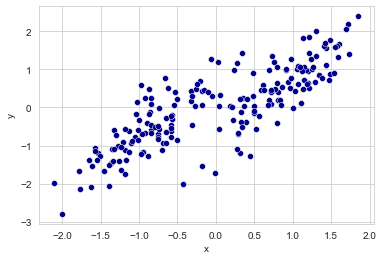

In [35]:
sns.scatterplot(x = 'x',y = 'y', data =data,color = 'darkblue')
plt.show()

In [36]:
dbScan = DBSCAN(eps = 0.5, min_samples = 25).fit(data)
labels = dbScan.labels_
data['cluster'] = labels 

<AxesSubplot:xlabel='x', ylabel='y'>

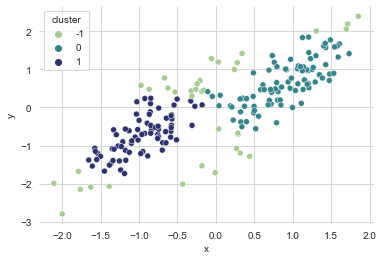

In [37]:
sns.set_style('whitegrid')
plt.box(False)
sns.scatterplot(x = 'x',y = 'y', data =data,hue = 'cluster',palette= "crest")

In [55]:
# grab only clutered data points 
df_clustered = data.loc[(data.cluster>=0)]
# finding the silhouette_score 
silhouette_score(df_clustered[['x','y']], df_clustered['cluster'])

0.6169609560667532

In [57]:
# data.iloc[2,1:]  # iloc usage 
# overall silhoette score 
silhouette_score(data[['x','y']],data['cluster'])

0.3976028470214306

## <font color = "darkblue"> Elbow method to find the optimal epsilon value 
<a href = "clustering_reference_materials/fastcluster.pdf">fastcluster</a>

In [110]:
mins = 4
nn = NearestNeighbors(mins+1) 
nn.fit(data[["x",'y']])
distances, neighbors = nn.kneighbors(data[["x","y"]]) 
# sort the distances
distances = np.sort(distances[:,mins], axis = 0)
distances_df = pd.DataFrame({
    "distances":distances, 
    "index":list(range(0,len(distances)))
})
distances_df

,distances,index
0,0.061378,0
1,0.082244,1
2,0.086559,2
3,0.089579,3
4,0.089727,4
...,...,...
195,0.638670,195
196,0.674367,196
197,0.719936,197
198,0.866762,198


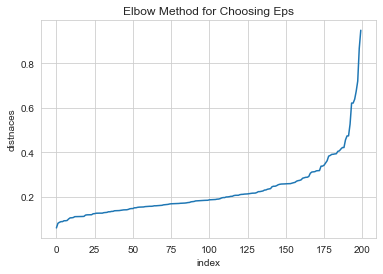

In [120]:
plt.title('Elbow Method for Choosing Eps') 
plt.ylabel('distnaces') 
plt.xlabel('index')
plt.plot(distances)
plt.show()